# Milestone Project 1: Food Vision Big

## Check GPU
In order to use mixed precision training, we need access to a Card with a Compute-Capability over 7+ (see here https://developer.nvidia.com/cuda-gpus)

In [2]:
!nvidia-smi -L

GPU 0: NVIDIA GeForce GTX 1050 (UUID: GPU-0ca3a9ef-dc58-0ce6-e857-0a1106ed4ced)


## Get helper functions

In the past modules we used a bunch of helper functions to do small tasks required for the notebooks.

Rather than rewrite all of these, we can import them from an external file.

In [3]:
# Import series of helper functions for the notebook
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys

## Use TensorFlow Datasets to Download Data
Overview of TensorFlow Datasets (TFDS), read the guide https://www.tensorflow.org/datasets/overview

In [4]:
# get TensorFlow Datasets
import tensorflow_datasets as tfds

In [5]:
# List all available datasets
datasets_list = tfds.list_builders() # get all available TFDS
print(len(datasets_list), "Datasets available")
print("food101" in datasets_list) # is our target dataset in list of TFDS datasets?

352 Datasets available
True


In [7]:
# Load in the data (takes a few minutes)
(train_data, test_data), ds_info = tfds.load(name="food101",
                                            split=["train", "validation"],
                                            data_dir="/dataset/",
                                            shuffle_files=True,
                                            as_supervised=True, # data gets returned in tuple format (data, label)
                                            with_info=True,)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling \dataset\food101\2.0.0.incompleteIHU8T5\food101-train.tfrecord*...:   0%|          | 0/75750 [00:00<…

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling \dataset\food101\2.0.0.incompleteIHU8T5\food101-validation.tfrecord*...:   0%|          | 0/25250 [0…

Dataset food101 downloaded and prepared to /dataset/food101\2.0.0. Subsequent calls will reuse this data.


## Exploring the Food101 data from TensorFlow Datasets

Want to find:
* Class names
* The shape of our input data (image tensors)
* The datatype of the input data
* What the labels look like (e.g. are they one-hot encoded or are they label encoded)
* Do the labels match up with the class names

In [14]:
# Features of Food101 from TFDS
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [15]:
# Get the class names
class_names = ds_info.features["label"].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [17]:
# Take one sample of the train data
train_one_sample = train_data.take(1) # samples are in format (image_tensor, label)

In [18]:
# What does one sample of the training data look like
train_one_sample

<TakeDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [22]:
# Output info about the training sample
for image, label in train_one_sample:
    print(f"""
    Image shape: {image.shape}
    Image datatype: {image.dtype}
    Target class from Food101 (tensor form): {label}
    Class name (str form): {class_names[label.numpy()]}
    """)


    Image shape: (512, 384, 3)
    Image datatype: <dtype: 'uint8'>
    Target class from Food101 (tensor form): 19
    Class name (str form): chicken_quesadilla
    


In [33]:
# What does the image tensor from TFDS's Food101 look like?
image

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  7,   7,   5],
        [ 11,  11,   9],
        [ 14,  14,  12]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  5,   5,   3],
        [  8,   8,   6],
        [ 11,  11,   9]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  5,   5,   3],
        [  7,   7,   5],
        [ 10,  10,   8]],

       ...,

       [[ 72,  75,  82],
        [ 55,  58,  65],
        [ 43,  46,  51],
        ...,
        [105, 113, 115],
        [108, 113, 116],
        [135, 140, 143]],

       [[ 75,  80,  86],
        [ 61,  66,  72],
        [ 51,  54,  59],
        ...,
        [102, 107, 110],
        [ 75,  79,  82],
        [111, 115, 118]],

       [[ 94,  99, 105],
        [ 81,  86,  92],
        [ 71,  74,  79],
        ...,
        [151, 156, 15

In [35]:
# What are the min and max values of the image tensor
import tensorflow as tf
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

(-0.5, 383.5, 511.5, -0.5)

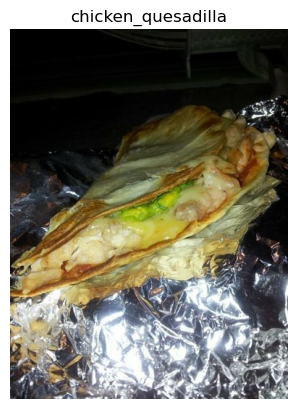

In [38]:
### Plot an image from TensorFlow Dataset
import matplotlib.pyplot as plt

plt.imshow(image)
plt.title(class_names[label.numpy()]) # Add title to image to verify the label is associated with the right image
plt.axis(False)
plt.bac